<a href="https://colab.research.google.com/github/nvisagan/DS-Unit-2-Regression-Classification/blob/master/module2/lesson_regression_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---



# Regression & Classification, Module 2
- Go from simple regression (1 feature) to multiple regression (2+ features)
- Get and plot coefficients
- Use regression metrics: MAE (Mean Absolute Error) and $R^2$ Score
- Understand how ordinary least squares regression minimizes the sum of squared errors
- Explain why overfitting is a problem. Do train/test split

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module2')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# Go from simple regression (1 feature) to multiple regression (2+ features)

## Overview: Predict Elections! 🗳️

In [3]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('../data/bread_peace_voting.csv')
px.scatter(
    df,
    x='Average Recent Growth in Personal Incomes',
    y='Incumbent Party Vote Share',
    text='Year',
    title='US Presidential Elections, 1952-2016',
    trendline='ols',  # Ordinary Least Squares
)

#### Douglas Hibbs, [Background Information on the ‘Bread and Peace’ Model of Voting in Postwar US Presidential Elections](https://douglas-hibbs.com/background-information-on-bread-and-peace-voting-in-us-presidential-elections/)

> Aggregate two-party vote shares going to candidates of the party holding the presidency during the postwar era are well explained by just two fundamental determinants:

> (1) Positively by weighted-average growth of per capita real disposable personal income over the term.  
> (2) Negatively by cumulative US military fatalities (scaled to population) owing to unprovoked, hostile deployments of American armed forces in foreign wars.

#### Data sources
- 1952-2012: Douglas Hibbs, [2014 lecture at Deakin University Melbourne](http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf), Slide 40
- 2016, Vote Share: [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections)
- 2016, Recent Growth in Personal Incomes: [The 2016 election economy: the "Bread and Peace" model final forecast](https://angrybearblog.com/2016/11/the-2016-election-economy-the-bread-and-peace-model-final-forecast.html)
- 2016, US Military Fatalities: Assumption that Afghanistan War fatalities in 2012-16 occured at the same rate as 2008-12

> Fatalities denotes the cumulative number of American military fatalities per millions of US population the in Korea, Vietnam, Iraq and Afghanistan wars during the presidential terms preceding the 1952, 1964, 1968, 1976 and 2004, 2008 and 2012 elections. —[Hibbs](http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf), Slide 33

## Follow Along

Look at the data

In [4]:
df

,Year,Incumbent Party Candidate,Other Candidate,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share
0,1952,Stevenson,Eisenhower,2.40,190,44.60
1,1956,Eisenhower,Stevenson,2.89,0,57.76
2,1960,Nixon,Kennedy,0.85,0,49.91
3,1964,Johnson,Goldwater,4.21,1,61.34
4,1968,Humphrey,Nixon,3.02,146,49.60
5,1972,Nixon,McGovern,3.62,0,61.79
6,1976,Ford,Carter,1.08,2,48.95
7,1980,Carter,Reagan,-0.39,0,44.70
8,1984,Reagan,Mondale,3.86,0,59.17
9,1988,"Bush, Sr.",Dukakis,2.27,0,53.94


What's the average Incumbent Party Vote Share?

In [9]:
df["Incumbent Party Vote Share"].mean()

51.82823529411765

Add another feature to the scatterplot

In [13]:
px.scatter_3d(
    df, 
    x= "Average Recent Growth in Personal Incomes",
    y="US Military Fatalities per Million",
    z="Incumbent Party Vote Share",
    text="Year",
    title = "US Preseidential Elections, 1952-2016"
)

Plot the hyperplane of best fit

In [0]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

In [16]:
regression_3d(
    df,
    x='Average Recent Growth in Personal Incomes', 
    y='US Military Fatalities per Million', 
    z='Incumbent Party Vote Share', 
    text='Year', 
    title='US Presidential Elections, 1952-2016'
)

Fit Linear Regression with 2 features


- Jake VanderPlas, [_Python Data Science Handbook,_ Chapter 5.2, Introducing Scikit-Learn — Basics of the API](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)
- Scikit-Learn documentation, [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [19]:
# 1. Import the appropriate estimator class from Scikit-Learn
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
model = LinearRegression()

# 3. Arrange X features matrix & y target vector
features = ['Average Recent Growth in Personal Incomes', 
            'US Military Fatalities per Million']
target = 'Incumbent Party Vote Share'
X = df[features]
Y = df[target]
# 4. Fit the model
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Challenge

# Get and plot coefficients

## Overview

## Follow Along

What's the equation for the hyperplane?

Can you relate the intercept and coefficients to what you see in the plot?

In [21]:
model.intercept_, model.coef_

(46.88551694148949, array([ 3.40621407, -0.05375223]))

What if ...

Income growth = 0%, fatalities = 0

In [43]:
# Easier to read
print("Intercept", model.intercept_)
coefficients = pd.Series(model.coef_, features)
pd.Series(model.coef_, features)

Intercept 46.88551694148949


Average Recent Growth in Personal Incomes    3.406214
US Military Fatalities per Million          -0.053752
dtype: float64

Income growth = 1% (fatalities = 0)

In [27]:
model.predict([[0,0]])

array([46.88551694])

The difference between these predictions = ? 

In [28]:
model.predict([[1, 0]]) - model.predict([[0, 0]])

array([3.40621407])

What if... income growth = 2% (fatalities = 0)

In [29]:
model.predict([[2, 0]])

array([53.69794508])

The difference between these predictions = ?

In [30]:
model.predict([[2, 0]]) - model.predict([[1, 0]])

array([3.40621407])

What if... (income growth=2%) fatalities = 100

In [31]:
model.predict([[2, 100]])

array([48.32272205])

The difference between these predictions = ?

In [32]:
# 100 * fatalities coefficient
model.predict([[2, 100]]) - model.predict([[2, 0]])

array([-5.37522303])

What if income growth = 3% (fatalities = 100)

In [33]:
model.predict([[3, 100]])

array([51.72893612])

The difference between these predictions = ?

In [34]:
model.predict([[3, 100]]) - model.predict([[2, 100]])

array([3.40621407])

What if (income growth = 3%) fatalities = 200

In [36]:
model.predict([[3,200]])

array([46.35371309])

The difference between these predictions = ?

In [40]:
model.predict([[3, 200]]) - model.predict([[3, 100]])

array([-5.37522303])

Plot coefficients

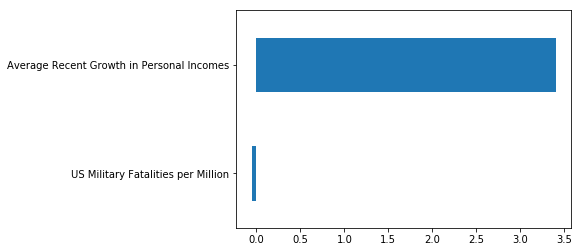

In [44]:
%matplotlib inline
coefficients.sort_values().plot.barh(); 

## Challenge

#  Use regression metrics: MAE (Mean Absolute Error) and $R^2$ Score

## Overview

## Follow Along

How's the error?

In [47]:
y_pred = model.predict(X)

df['Predicted'] = y_pred
df['Error'] = y_pred - Y

df

,Year,Incumbent Party Candidate,Other Candidate,Average Recent Growth in Personal Incomes,US Military Fatalities per Million,Incumbent Party Vote Share,Predicted,Error
0,1952,Stevenson,Eisenhower,2.40,190,44.60,44.847507,0.247507
1,1956,Eisenhower,Stevenson,2.89,0,57.76,56.729476,-1.030524
2,1960,Nixon,Kennedy,0.85,0,49.91,49.780799,-0.129201
3,1964,Johnson,Goldwater,4.21,1,61.34,61.171926,-0.168074
4,1968,Humphrey,Nixon,3.02,146,49.60,49.324458,-0.275542
5,1972,Nixon,McGovern,3.62,0,61.79,59.216012,-2.573988
6,1976,Ford,Carter,1.08,2,48.95,50.456724,1.506724
7,1980,Carter,Reagan,-0.39,0,44.70,45.557093,0.857093
8,1984,Reagan,Mondale,3.86,0,59.17,60.033503,0.863503
9,1988,"Bush, Sr.",Dukakis,2.27,0,53.94,54.617623,0.677623


How does this compare to guessing?

In [48]:
df["Error"].mean()

-3.761696836377001e-15

In [49]:
df['Error'].abs().mean()

1.3975663494016117

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, y_pred)

1.3975663494016117

How does this compare to guessing?

In [53]:
# What was the average incumbent party vote share?
Y.mean()

51.82823529411765

In [0]:
# WHAT IF ... we guessed this number for every election?
guesses = [Y.mean()] * len(Y)

In [57]:
# How far off would this be on average?
mean_absolute_error(Y, guesses)

4.463806228373702

Plot the "residuals" (errors)

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

def regression_residuals(df, feature, target, m, b):
    """
    Visualize linear regression, with residual errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    df.plot.scatter(feature, target)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    plt.plot(x, y_pred)
    
    # Plot residual errors
    for x, y1, y2 in zip(x, y, y_pred):
        plt.plot((x, x), (y1, y2), color='grey')
    
    # Print regression metrics
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)


Mean Absolute Error: 4.463806228373702
R^2: 0.0


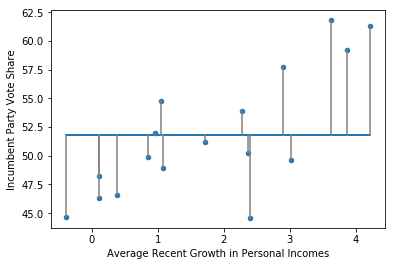

In [60]:
feature = 'Average Recent Growth in Personal Incomes'
regression_residuals(df, feature, target, m=0, b=Y.mean())

In [61]:
from ipywidgets import interact, fixed

interact(
    regression_residuals,
    df=fixed(df), 
    feature=fixed(feature), 
    target=fixed(target), 
    m=(-5, 5, 0.5), 
    b=(40, 60, 0.5)
);

interactive(children=(FloatSlider(value=0.0, description='m', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

## Challenge

# Understand how ordinary least squares regression minimizes the sum of squared errors

## Overview

But Ordinary Least Squares Regression *doesn't* directly minimize MAE or R^2...

1. Guess & Check
2. Linear Algebra

## Follow Along

### Guess & Check

In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regression_squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 12.00542352941177
Root Mean Squared Error: 3.4648843457483207
Mean Absolute Error: 2.556470588235295
R^2: 0.5799637280695265


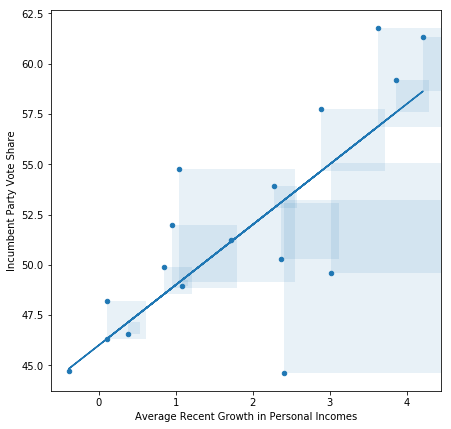

In [63]:
regression_squared_errors(df, feature, target, m=3, b=46)

### Linear Algebra

The same result that is found by minimizing the sum of the squared errors can be also found through a linear algebra process known as the "Least Squares Solution:"

\begin{align}
\hat{\beta} = (X^{T}X)^{-1}X^{T}y
\end{align}

Before we can work with this equation in its linear algebra form we have to understand how to set up the matrices that are involved in this equation. 

### The $\beta$ vector

The $\beta$ vector represents all the parameters that we are trying to estimate, our $y$ vector and $X$ matrix values are full of data from our dataset. The $\beta$ vector holds the variables that we are solving for: $\beta_0$ and $\beta_1$

Now that we have all of the necessary parts we can set them up in the following equation:

\begin{align}
y = X \beta + \epsilon
\end{align}

Since our $\epsilon$ value represents **random** error we can assume that it will equal zero on average.

\begin{align}
y = X \beta
\end{align}

The objective now is to isolate the $\beta$ matrix. We can do this by pre-multiplying both sides by "X transpose" $X^{T}$.

\begin{align}
X^{T}y =  X^{T}X \beta
\end{align}

Since anything times its transpose will result in a square matrix, if that matrix is then an invertible matrix, then we should be able to multiply both sides by its inverse to remove it from the right hand side. (We'll talk tomorrow about situations that could lead to $X^{T}X$ not being invertible.)

\begin{align}
(X^{T}X)^{-1}X^{T}y =  (X^{T}X)^{-1}X^{T}X \beta
\end{align}

Since any matrix multiplied by its inverse results in the identity matrix, and anything multiplied by the identity matrix is itself, we are left with only $\beta$ on the right hand side:

\begin{align}
(X^{T}X)^{-1}X^{T}y = \hat{\beta}
\end{align}

We will now call it "beta hat" $\hat{\beta}$ because it now represents our estimated values for $\beta_0$ and $\beta_1$

### Lets calculate our $\beta$ coefficients with numpy!

In [64]:
# This is NOT an objective you'll be tested on. It's just a demo.

# X is a matrix. Add constant for the intercept.
from statsmodels.api import add_constant
X = add_constant(df[feature].values)
print('X')
print(X)

# y is a column vector
y = df[target].values[:, np.newaxis]
print('y')
print(y)

# Least squares solution in code
X_transpose = X.T
X_transpose_X = X_transpose @ X
X_transpose_X_inverse = np.linalg.inv(X_transpose_X)
X_transpose_y = X_transpose @ y
beta_hat = X_transpose_X_inverse @ X_transpose_y

print('Beta Hat')
print(beta_hat)

X
[[ 1.    2.4 ]
 [ 1.    2.89]
 [ 1.    0.85]
 [ 1.    4.21]
 [ 1.    3.02]
 [ 1.    3.62]
 [ 1.    1.08]
 [ 1.   -0.39]
 [ 1.    3.86]
 [ 1.    2.27]
 [ 1.    0.38]
 [ 1.    1.04]
 [ 1.    2.36]
 [ 1.    1.72]
 [ 1.    0.1 ]
 [ 1.    0.95]
 [ 1.    0.1 ]]
y
[[44.6 ]
 [57.76]
 [49.91]
 [61.34]
 [49.6 ]
 [61.79]
 [48.95]
 [44.7 ]
 [59.17]
 [53.94]
 [46.55]
 [54.74]
 [50.27]
 [51.24]
 [46.32]
 [52.  ]
 [48.2 ]]
Beta Hat
[[46.49920976]
 [ 2.97417709]]


In [70]:
# Scikit-learn gives the exact same results
from sklearn.linear_model import LinearRegression
model = LinearRegression()
features = ['Average Recent Growth in Personal Incomes']
target = 'Incumbent Party Vote Share'
X = df[features]
y = df[target]
model.fit(X, y)
model.intercept_, model.coef_

KeyError: ignored

## Challenge

# Explain why overfitting is a problem. Do train/test split

## Overview

#### Jake VanderPlas, [_Python Data Science Handbook,_ Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off)

Fundamentally, the question of "the best model" is about finding a sweet spot in the tradeoff between bias and variance. Consider the following figure, which presents two regression fits to the same dataset:

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-bias-variance-2.png)

The model on the left attempts to find a straight-line fit through the data. Because the data are intrinsically more complicated than a straight line, the straight-line model will never be able to describe this dataset well. Such a model is said to _underfit_ the data: that is, it does not have enough model flexibility to suitably account for all the features in the data; another way of saying this is that the model has high _bias_.

The model on the right attempts to fit a high-order polynomial through the data. Here the model fit has enough flexibility to nearly perfectly account for the fine features in the data, but even though it very accurately describes the training data, its precise form seems to be more reflective of the particular noise properties of the data rather than the intrinsic properties of whatever process generated that data. Such a model is said to _overfit_ the data: that is, it has so much model flexibility that the model ends up accounting for random errors as well as the underlying data distribution; another way of saying this is that the model has high _variance_.


From the scores associated with these two models, we can make an observation that holds more generally:

- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.

- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

If we imagine that we have some ability to tune the model complexity, we would expect the training score and validation score to behave as illustrated in the following figure:

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png)

The diagram shown here is often called a validation curve, and we see the following essential features:

- The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
- For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
- For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

The means of tuning the model complexity varies from model to model.

## Follow Along

Wrangle New York City property sales data

In [0]:
# Read New York City property sales data, from first 4 months of 2019.
# Dataset has 23040 rows, 21 columns.
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')
assert df.shape == (23040, 21)

# Change column names. Replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# Remove symbols from SALE_PRICE string, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

# Keep subset of rows:
# Tribeca neighborhood, Condos - Elevator Apartments, 
# 1 unit, sale price more than $1, less than $35 million
mask = (
    (df['NEIGHBORHOOD'].str.contains('TRIBECA')) & 
    (df['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS') &
    (df['TOTAL_UNITS'] == 1) & 
    (df['SALE_PRICE'] > 0) & 
    (df['SALE_PRICE'] < 35000000)
)
df = df[mask]

# Data now has 90 rows, 21 columns
assert df.shape == (90, 21)

# Convert SALE_DATE to datetime
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)

from ipywidgets import interact
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read New York City property sales data, from first 4 months of 2019.
# Dataset has 23040 rows, 21 columns.
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')
assert df.shape == (23040, 21)

# Change column names. Replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]

# Remove symbols from SALE_PRICE string, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)

# Keep subset of rows:
# Tribeca neighborhood, Condos - Elevator Apartments, 
# 1 unit, sale price more than $1, less than $35 million
mask = (
    (df['NEIGHBORHOOD'].str.contains('TRIBECA')) & 
    (df['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS') &
    (df['TOTAL_UNITS'] == 1) & 
    (df['SALE_PRICE'] > 0) & 
    (df['SALE_PRICE'] < 35000000)
)
df = df[mask]

# Data now has 90 rows, 21 columns
assert df.shape == (90, 21)

# Convert SALE_DATE to datetime
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)

# Arrange X features matrix & y target vector
features = ['GROSS_SQUARE_FEET']
target = 'SALE_PRICE'
X = df[features]
y = df[target]

Do random train/test spliit

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

Repeatedly fit increasingly complex models, and keep track of the scores

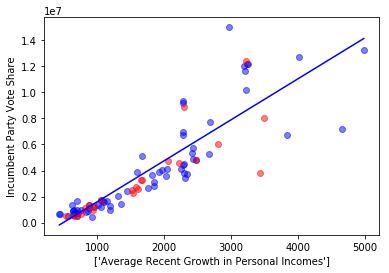

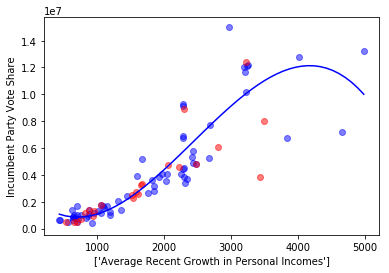

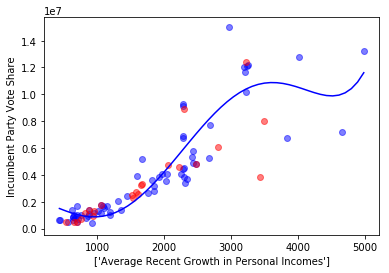

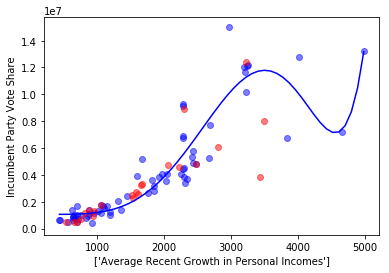

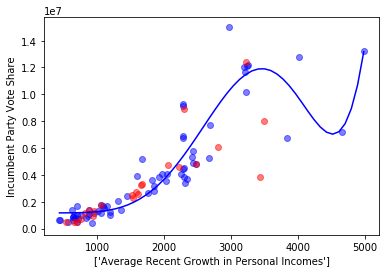

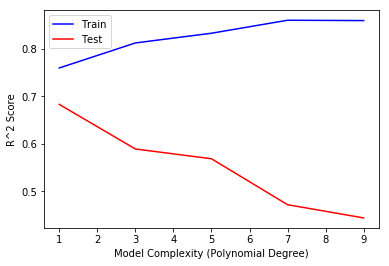

In [68]:
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Credit: Jake VanderPlas, Python Data Science Handbook, Chapter 5.3
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#Validation-curves-in-Scikit-Learn
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


polynomial_degrees = range(1, 10, 2)
train_r2s = []
test_r2s = []

for degree in polynomial_degrees:
    model = PolynomialRegression(degree)
    display(HTML(f'Polynomial degree={degree}'))
    
    model.fit(X_train, y_train)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    display(HTML(f'<b style="color: blue">Train R2 {train_r2:.2f}</b>'))
    display(HTML(f'<b style="color: red">Test R2 {test_r2:.2f}</b>'))

    plt.scatter(X_train, y_train, color='blue', alpha=0.5)
    plt.scatter(X_test, y_test, color='red', alpha=0.5)
    plt.xlabel(features)
    plt.ylabel(target)
    
    x_domain = np.linspace(X.min(), X.max())
    curve = model.predict(x_domain)
    plt.plot(x_domain, curve, color='blue')
    plt.show()
    display(HTML('<hr/>'))
    
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)
    
display(HTML('Validation Curve'))
plt.plot(polynomial_degrees, train_r2s, color='blue', label='Train')
plt.plot(polynomial_degrees, test_r2s, color='red', label='Test')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

## Challenge

# Review

# Sources

Jake VanderPlas, [_Python Data Science Handbook,_ Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off)


#### Douglas Hibbs, [Background Information on the ‘Bread and Peace’ Model of Voting in Postwar US Presidential Elections](https://douglas-hibbs.com/background-information-on-bread-and-peace-voting-in-us-presidential-elections/)

> Aggregate two-party vote shares going to candidates of the party holding the presidency during the postwar era are well explained by just two fundamental determinants:

> (1) Positively by weighted-average growth of per capita real disposable personal income over the term.  
> (2) Negatively by cumulative US military fatalities (scaled to population) owing to unprovoked, hostile deployments of American armed forces in foreign wars.

#### Data sources
- 1952-2012: Douglas Hibbs, [2014 lecture at Deakin University Melbourne](http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf), Slide 40
- 2016, Vote Share: [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections)
- 2016, Recent Growth in Personal Incomes: [The 2016 election economy: the "Bread and Peace" model final forecast](https://angrybearblog.com/2016/11/the-2016-election-economy-the-bread-and-peace-model-final-forecast.html)
- 2016, US Military Fatalities: Assumption that Afghanistan War fatalities in 2012-16 occured at the same rate as 2008-12

> Fatalities denotes the cumulative number of American military fatalities per millions of US population the in Korea, Vietnam, Iraq and Afghanistan wars during the presidential terms preceding the 1952, 1964, 1968, 1976 and 2004, 2008 and 2012 elections. —[Hibbs](http://www.douglas-hibbs.com/HibbsArticles/HIBBS-PRESVOTE-SLIDES-MELBOURNE-Part1-2014-02-26.pdf), Slide 33